In [1]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn
import pandas as pd
import rubisco_data

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
fname = '../data/062118_rubisco_kinetics_merged.csv'
raw_kin_df, kin_df = rubisco_data.load_rubisco_data(fname)

# Want to split data in various ways
# Savir vs. Non-Savir (mostly new) data
savir_pmid = '20142476'
savir_df = raw_kin_df[raw_kin_df.pmid_or_doi == savir_pmid]
nonsavir_df = raw_kin_df[raw_kin_df.pmid_or_doi != savir_pmid]

# Group by RuBisCO form
grouped_form = raw_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

In [3]:
print(raw_kin_df.shape[0], 'total WT RuBisCOs')
print(kin_df.shape[0], 'RuBisCOs with all core kinetic data measured')

357 total WT RuBisCOs
198 RuBisCOs with all core kinetic data measured


(0.9972430678782643, 2.2931397147644175e-223)


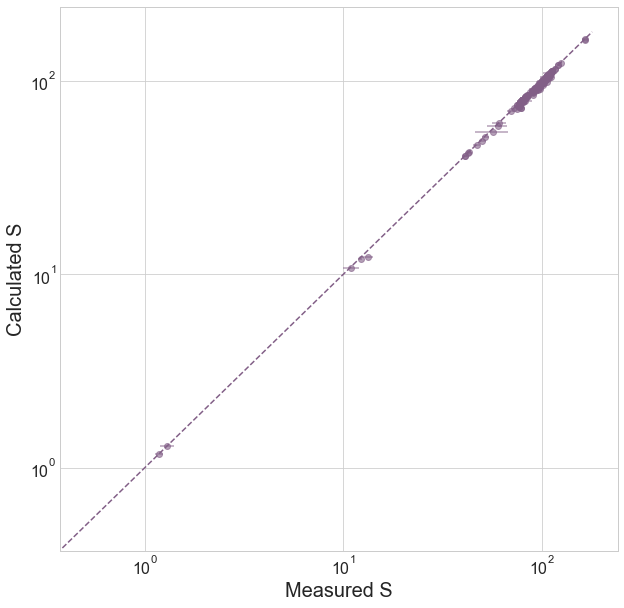

In [4]:
# Basically testing vO values are reasonable even though we inferred them.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

inferred_S = kin_df.vC * kin_df.KO / (kin_df.vO * kin_df.KC)
plt.errorbar(kin_df.S, inferred_S, xerr=kin_df.S_SD, c=named_colors[3], alpha=0.6, ls='', marker='o')

r = stats.pearsonr(kin_df.S, inferred_S)
print(r)

xs = np.arange(0, 180, 0.5)
plt.plot(xs, xs, ls='--', color=named_colors[3])

plt.xlabel('Measured S', fontsize=20)
plt.ylabel('Calculated S', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

(0.9999635172706588, 0.0)


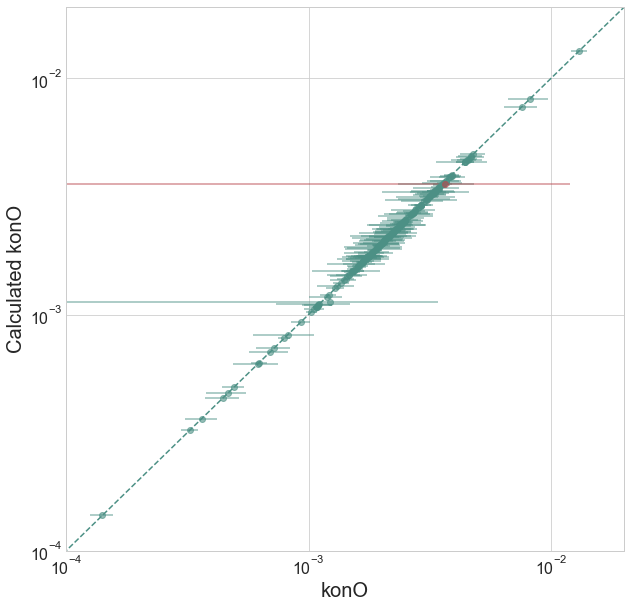

In [5]:
# Testing konO values are reasonable even though we inferred them.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

inferred_kon_O = kin_df.vO / kin_df.KO
mask = kin_df.kon_O_SD < 2 * kin_df.kon_O
low_error = kin_df[mask]
rest = kin_df[~mask]

plt.errorbar(low_error.kon_O, inferred_kon_O[mask], xerr=low_error.kon_O_SD, c=named_colors[4], alpha=0.6, ls='', marker='o')
plt.errorbar(rest.kon_O, inferred_kon_O[~mask], xerr=rest.kon_O_SD, c=named_colors[5], alpha=0.6, ls='', marker='o')

r = stats.pearsonr(kin_df.kon_O, inferred_kon_O)
print(r)

xs = np.arange(3e-5, 3e-2, 0.01)
plt.plot(xs, xs, ls='--', color=named_colors[4])

plt.xlabel('konO', fontsize=20)
plt.ylabel('Calculated konO', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1e-4, 2e-2)
plt.ylim(1e-4, 2e-2)

plt.show()

(0.9987461638826273, 7.205141373690059e-257)


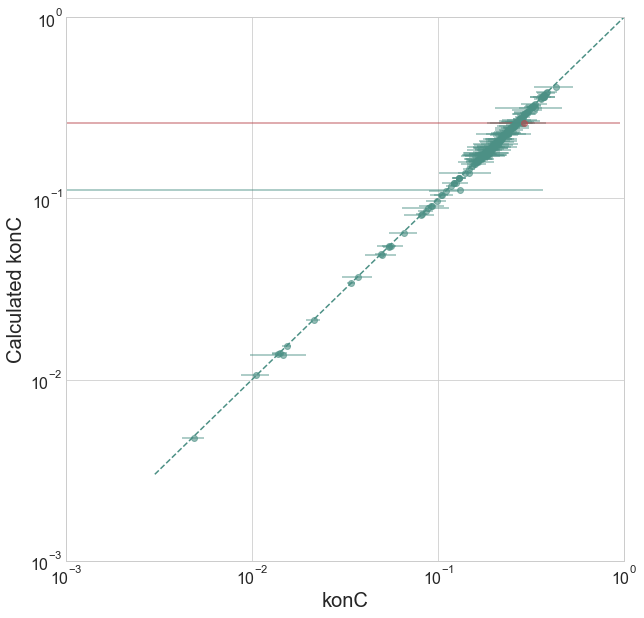

In [6]:
# Testing konO values are reasonable even though we inferred them.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

inferred_kon_C = kin_df.vC / kin_df.KC
mask = kin_df.kon_C_SD < 2 * kin_df.kon_C
low_error = kin_df[mask]
rest = kin_df[~mask]

plt.errorbar(low_error.kon_C, inferred_kon_C[mask], xerr=low_error.kon_C_SD, c=named_colors[4], alpha=0.6, ls='', marker='o')
plt.errorbar(rest.kon_C, inferred_kon_C[~mask], xerr=rest.kon_C_SD, c=named_colors[5], alpha=0.6, ls='', marker='o')

r = stats.pearsonr(kin_df.kon_C, inferred_kon_C)
print(r)

xs = np.arange(3e-3, 1.0, 0.001)
plt.plot(xs, xs, ls='--', color=named_colors[4])

plt.xlabel('konC', fontsize=20)
plt.ylabel('Calculated konC', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1e-3, 1.0)
plt.ylim(1e-3, 1.0)

plt.show()

In [24]:
all_F1 = kin_df[kin_df.isoform == '1']
mask = (all_F1.kon_C_SD < 2 * all_F1.kon_C) & (all_F1.kon_O_SD < 1.5 * all_F1.kon_O)
low_error = all_F1[mask]
rest = all_F1[~mask]

In [25]:
exps, pres = power_laws.bootstrap_power_law_odr(
    low_error.kon_O, low_error.kon_C,
    xs_std=low_error.kon_O_SD, ys_std=low_error.kon_C_SD,
    fraction=1.0, rounds=1000)

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/Users/abrahamflamholz/Documents/workspace/rubisco/notebooks/power_laws.py:162: RuntimeWarning: invalid value encountered in log
  exp, pre, _ = fit_power_law_odr(np.log(xs_sub), np.log(ys_sub))


[ 15.86872844 553.98525476]
[0.6989075  1.31126348]


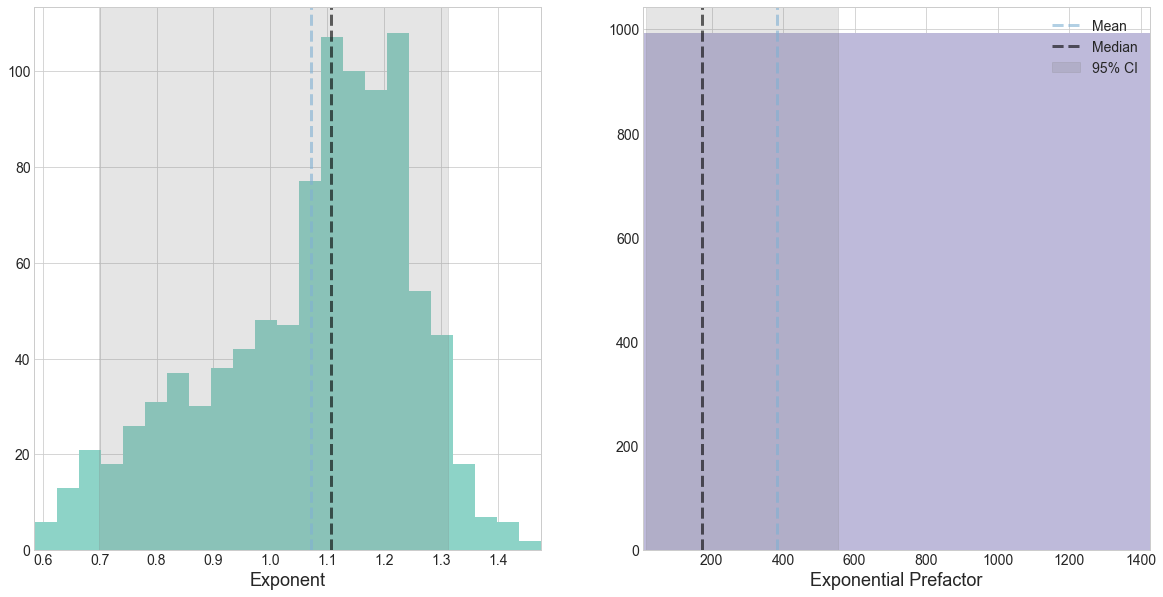

In [26]:
power_laws.plot_bootstrapped_range(exps, pres)

(0.8687541012034423, 1.3940667079616435e-59)
1.0652916453946022 138.69675018535364
1 92.62501894501139


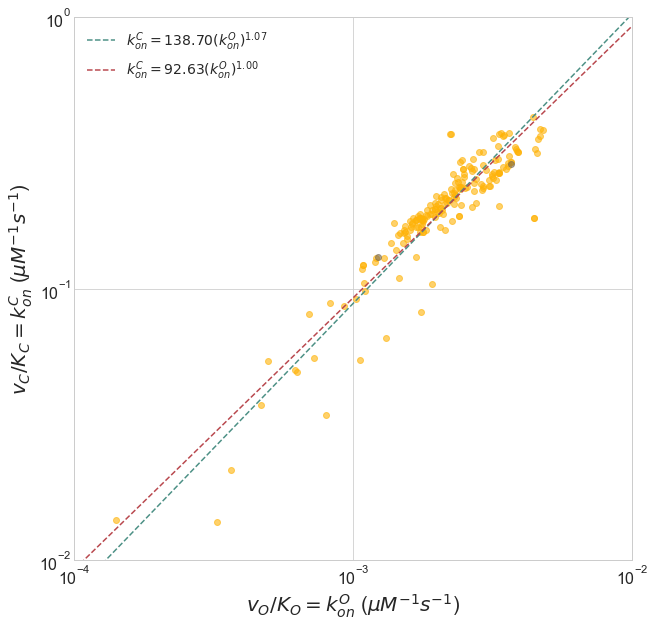

In [27]:
# Testing konO values are reasonable even though we inferred them.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

plt.scatter(low_error.kon_O, low_error.kon_C, c=named_colors[1], alpha=0.6, label='')
plt.scatter(rest.kon_O, rest.kon_C, c=named_colors[2], alpha=0.6, label='')

r = stats.pearsonr(low_error.kon_O, low_error.kon_C)
print(r)

xs = np.log(low_error.kon_O)
ys = np.log(low_error.kon_C)
exp, prefactor, _ = power_laws.fit_power_law_odr(xs, ys)
exp1, prefactor1, _ = power_laws.fit_power_law_odr(xs, ys, unit_exp=True)

print(exp, prefactor)
print(exp1, prefactor1)

xs = np.logspace(-4, -2, 100)
label = "$k_{on}^C = %.2f (k_{on}^O)^{%.2f}$" % (prefactor, exp)
plt.plot(xs, np.power(xs, exp)*prefactor, ls='--', c=named_colors[4], label=label)
label = "$k_{on}^C = %.2f (k_{on}^O)^{%.2f}$" % (prefactor1, exp1)
plt.plot(xs, np.power(xs, exp1)*prefactor1, ls='--', c=named_colors[5], label=label)

plt.legend(fontsize=14, loc=2)
plt.xlabel('$v_O / K_O = k_{on}^O$ ($\mu M^{-1} s^{-1}$)', fontsize=20)
plt.ylabel('$v_C / K_C = k_{on}^C$ ($\mu M^{-1} s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1e-4, 1e-2)
plt.ylim(1e-2, 1)

plt.show()

(0.9393050377136737, 9.56112800292139e-90)


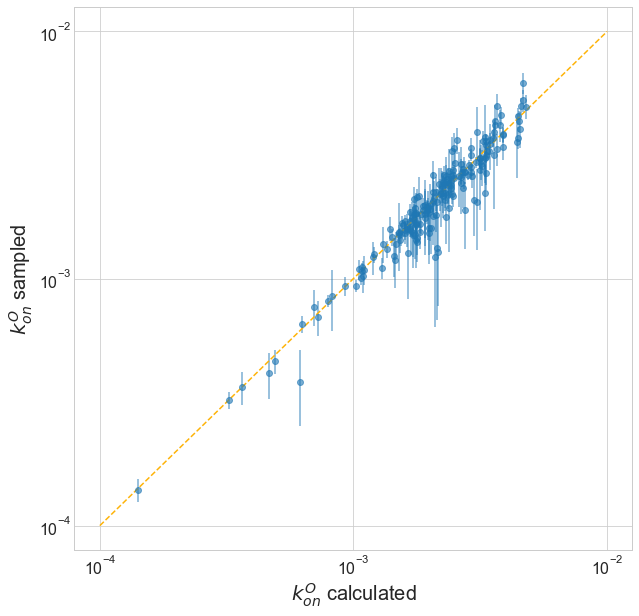

In [28]:
xs = (low_error.kon_O)
xs_std = low_error.kon_O_SD
sampled = np.random.normal(xs, xs_std)

print(stats.pearsonr(xs, sampled))

figure = plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.errorbar(xs, sampled, yerr=xs_std, ls='', marker='o', alpha=0.6, label='')

xs = np.logspace(-4, -2, 100)
plt.plot(xs, xs, c=named_colors[1], ls='--', label='x = y')

plt.xlabel('$k_{on}^O$ calculated', fontsize=20)
plt.ylabel('$k_{on}^O$ sampled', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()